In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

RANDOM_STATE: int = 54

# <font color = 'red'> ЛР 4. Exploratory data analysis Постановка задачи классифкации. </font>

Сложность: <font color = 'green'> Легко  </font>.

Дата составления: 30.09.2024

Срок выполнения: 2 недели (с момента первой практики после выдачи).

Автор: ст. преподаватель Кушнеров А.В.

## <font color = 'green'>1. Exploratory data analysis </font>

### <font color = 'green'> Пример 1. Загрузка данных и первичный анализ. На примере telecom.csv </font>

In [2]:
data = pd.read_csv('telecom.csv')

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [5]:
data['Churn']=data['Churn'].astype('int64')

In [6]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [8]:
data.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [12]:
data['Churn'].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [10]:
data['Churn'].value_counts(normalize = True)

Churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

In [ ]:
abons_stat = pd.Series(data[data['Churn'] == 1].mean(numeric_only=True),name='abons')           #считаем среднее значение тех, кто остался и добавляем в столбец abons
disertirs_stat = pd.Series(data[data['Churn'] == 0].mean(numeric_only=True),name='disertirs')   #тоже самое, но с теми кто остался
ratio = pd.Series(disertirs_stat/abons_stat,name = 'ratio')                                     #считаем отношение

In [13]:
pd.concat([abons_stat,disertirs_stat,ratio],axis = 1).sort_values(by='ratio')

,abons,disertirs,ratio
Churn,1.000000,0.000000,0.000000
Customer service calls,2.229814,1.449825,0.650200
Total day minutes,206.914079,175.175754,0.846611
Total day charge,35.175921,29.780421,0.846614
Total eve minutes,212.410145,199.043298,0.937071
Total eve charge,18.054969,16.918909,0.937078
Total intl charge,2.889545,2.743404,0.949424
Total intl minutes,10.700000,10.158877,0.949428
Total night charge,9.235528,9.006074,0.975155
Total night minutes,205.231677,200.133193,0.975157


In [14]:
pd.crosstab(data['Churn'], data['International plan']) #для категориальных

International plan,No,Yes
Churn,,
0,2664,186
1,346,137


In [15]:
pd.crosstab(data['Churn'], data['Voice mail plan'],normalize=True)

Voice mail plan,No,Yes
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


In [16]:
pd.crosstab(data['Churn'], data['International plan'],margins=True)

International plan,No,Yes,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [17]:
pd.crosstab(data['Churn'], data['Customer service calls'],margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


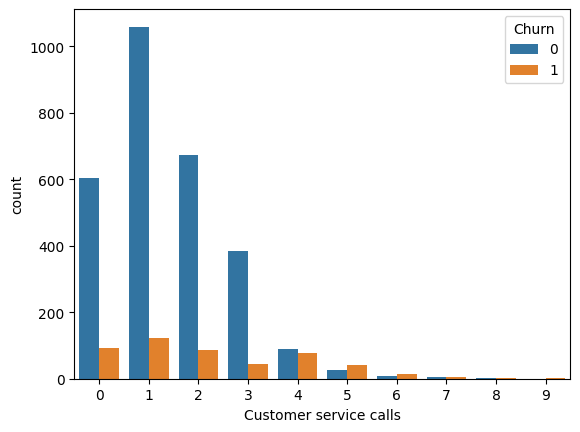

In [22]:
sns.countplot(x='Customer service calls', hue='Churn', data=data);

In [23]:
data['Intensive_service_calls_Q'] = (data['Customer service calls'] > 3).astype('int')

pd.crosstab(data['Intensive_service_calls_Q'], data['Churn'], margins=True)

Churn,0,1,All
Intensive_service_calls_Q,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


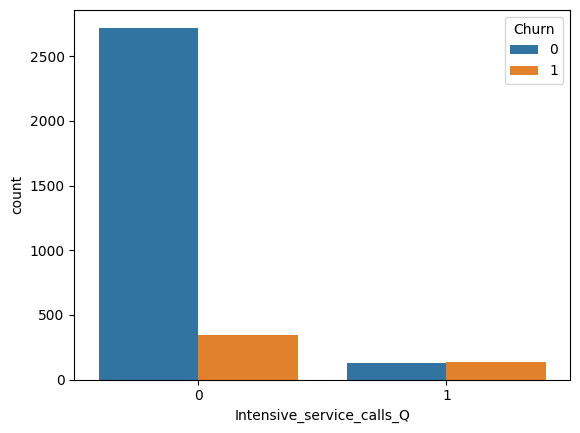

In [24]:
sns.countplot(x='Intensive_service_calls_Q', hue='Churn', data=data);

In [28]:
d = {'No' : 0, 'Yes' : 1}
data['International plan'] = data['International plan'].map(d)

In [26]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Intensive_service_calls_Q
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [29]:
data['Voice mail plan'] = data['Voice mail plan'].map(d)

In [30]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Intensive_service_calls_Q
0,KS,128,415,NaN,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,NaN,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,NaN,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,NaN,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,NaN,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


In [31]:
pd.crosstab(data['Intensive_service_calls_Q'] & data['International plan'] , data['Churn'])

Churn,0,1
row_0,,
False,2850,483


### <font color = 'green'> Пример 2. Корреляция. На примере telecom.csv </font>

In [32]:
corr_matrix = data.drop(['State', 'International plan', 'Voice mail plan',
                      'Area code'], axis=1).corr() #оставляем только количественные фичи

In [33]:
corr_matrix

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Intensive_service_calls_Q
Account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,0.006321
Number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,-0.002054
Total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,-0.005765
Total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.003287
Total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,-0.005763
Total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.001030
Total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.019002
Total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,0.001024
Total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,-0.016717
Total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141,-0.031733


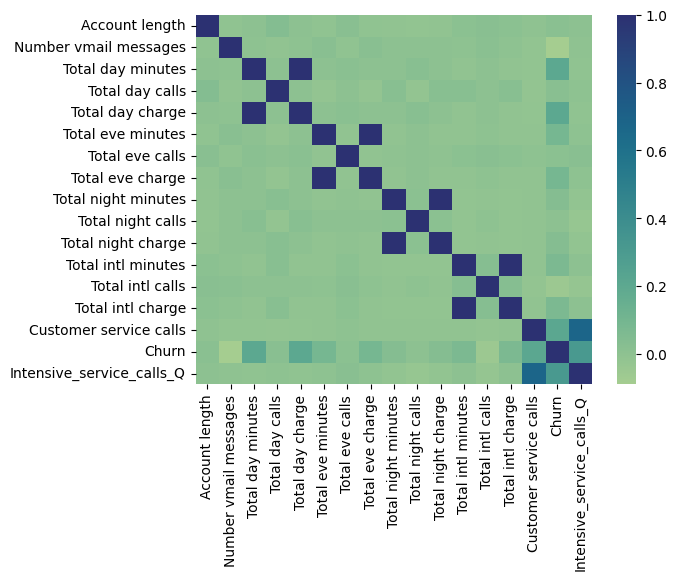

In [34]:
sns.heatmap(corr_matrix,cmap="crest");

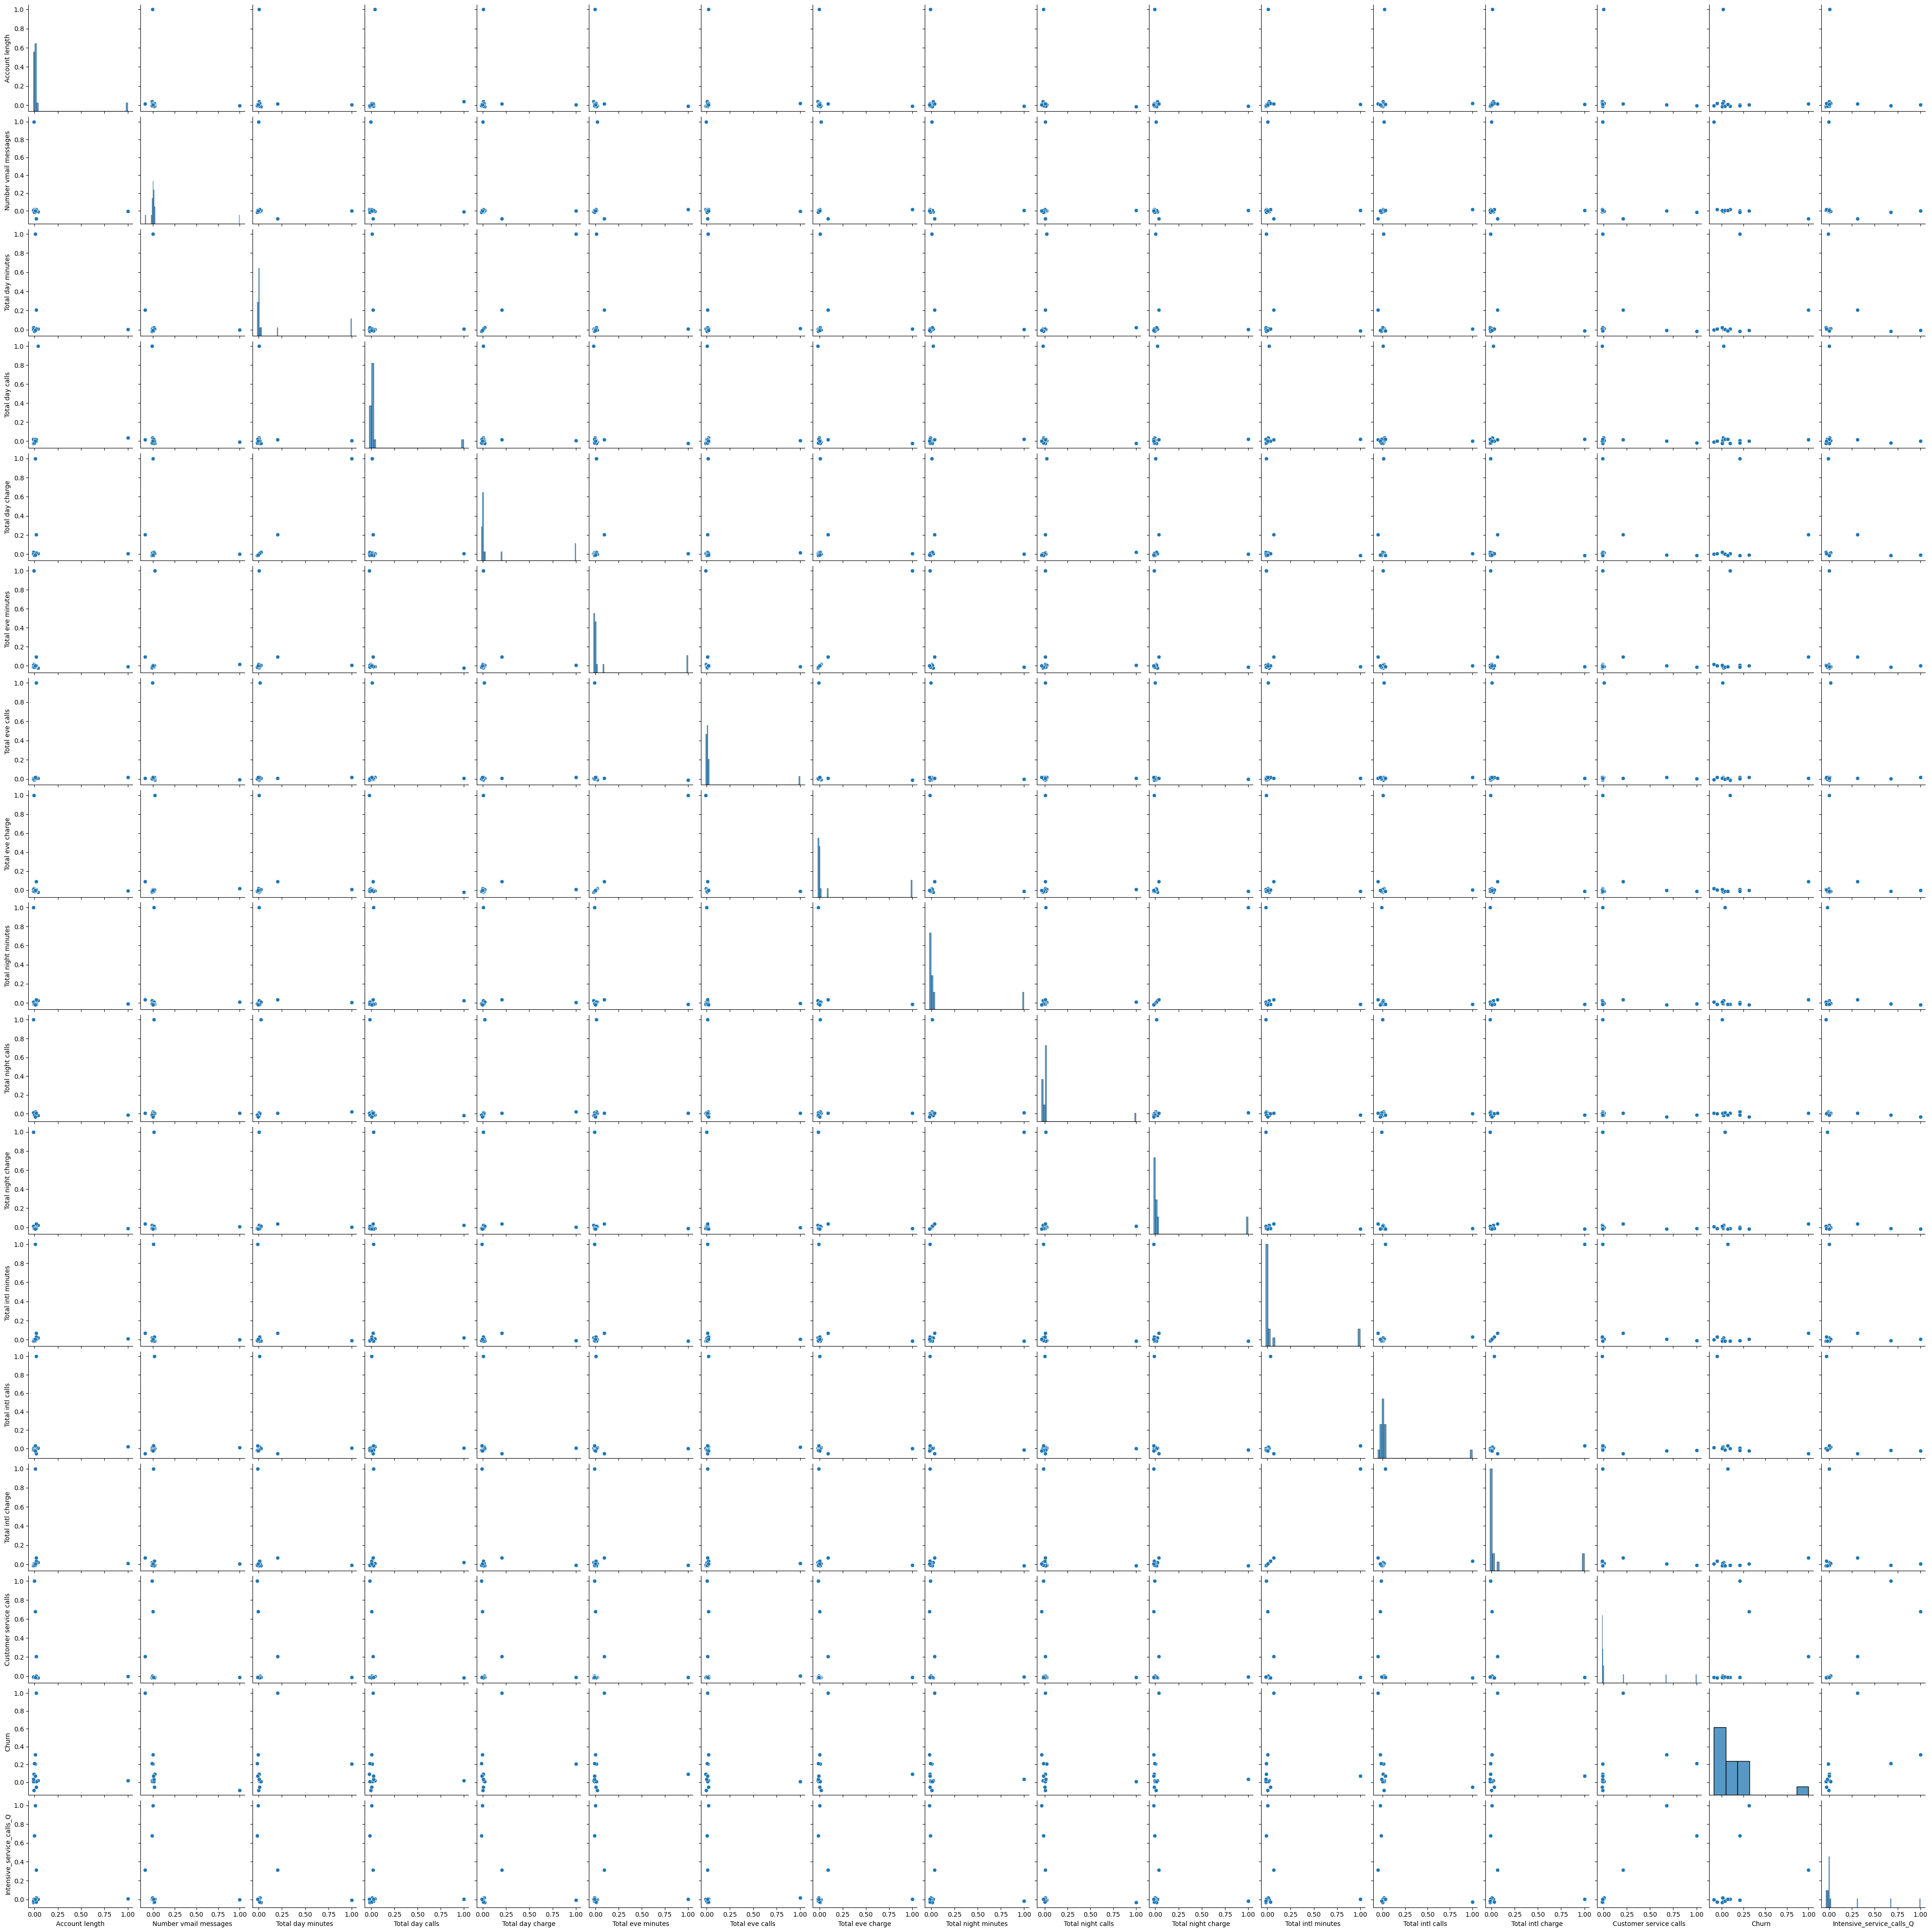

In [37]:
sns.pairplot(corr_matrix)

### <font color = 'green'> Пример 3. Графический анализ данных. На примере telecom.csv </font>

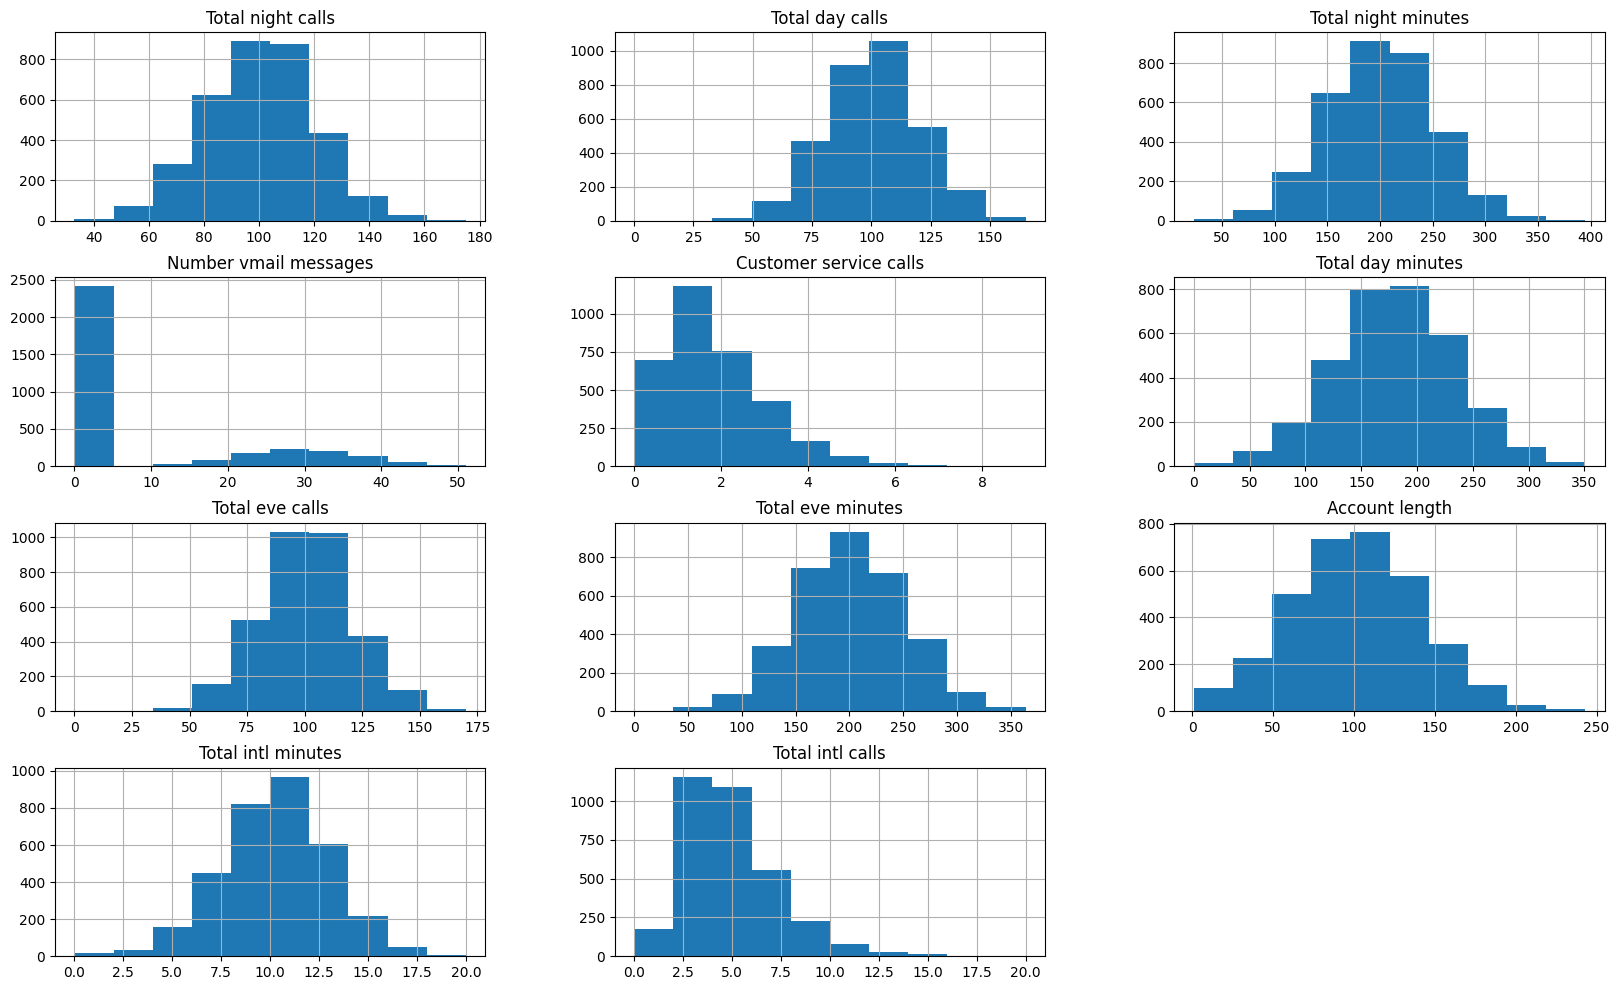

In [38]:
features = list(set(data.columns) - set(['State', 'International plan', 'Voice mail plan',  'Area code',
                                      'Total day charge',   'Total eve charge',   'Total night charge',
                                        'Total intl charge', 'Churn','Intensive_service_calls_Q','Phone number']))
data[features].hist(figsize=(20,12));

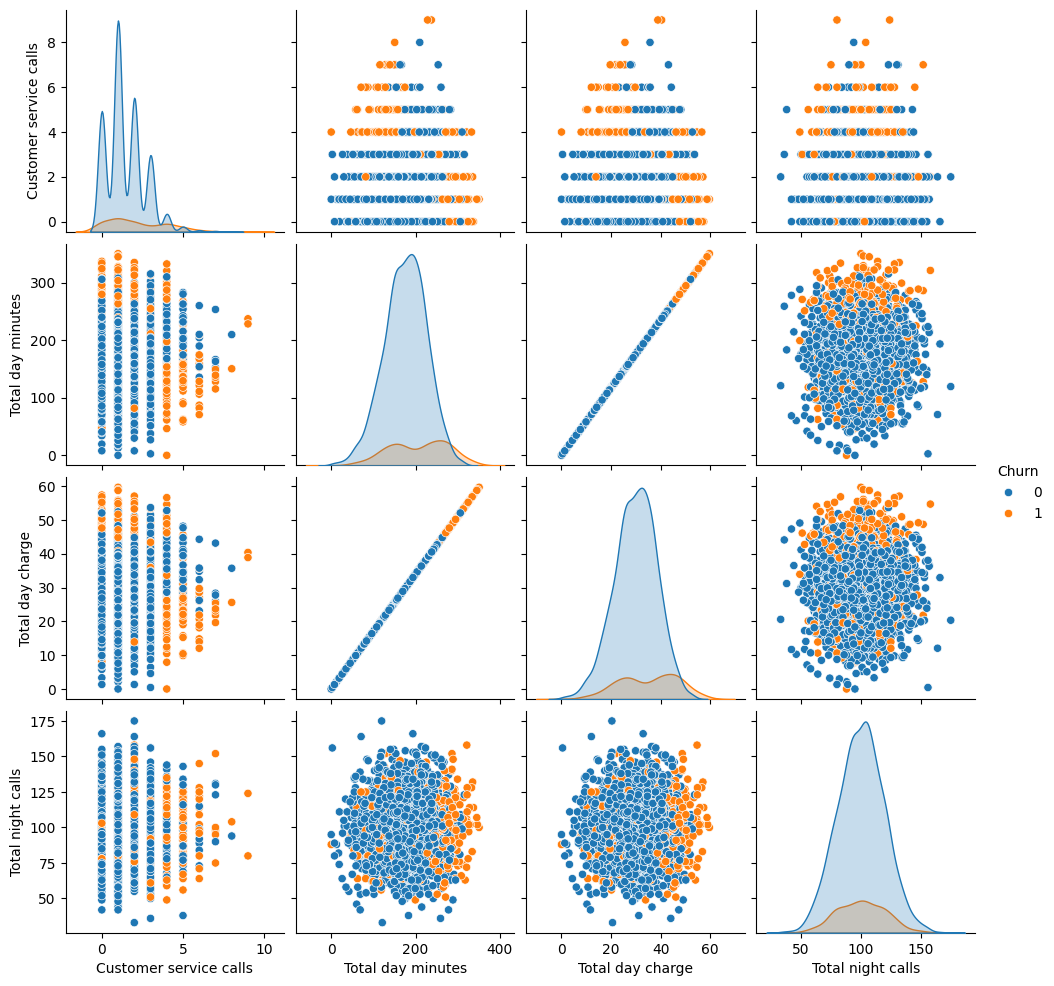

In [39]:
sns.pairplot(data[['Customer service calls','Total day minutes','Total day charge','Total night calls','Churn',]], hue='Churn');

### <font color = 'green'> Пример 4. Графический анализ данных. На примере Ирисов Фишера </font>

In [40]:
iris = sns.load_dataset('iris')


In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


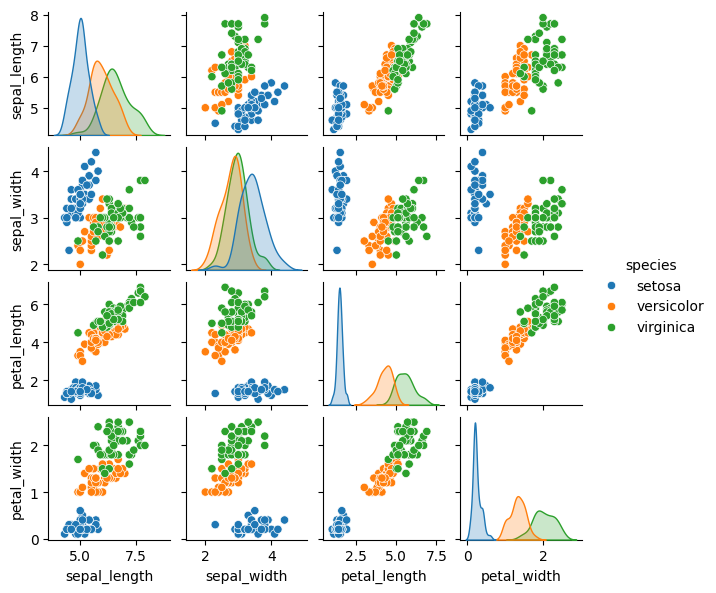

In [42]:
sns.pairplot(iris, hue='species',height=1.5);
plt.show();

In [43]:
features = list(set(iris.columns)-set(['species']))

In [44]:
features

['sepal_length', 'sepal_width', 'petal_width', 'petal_length']

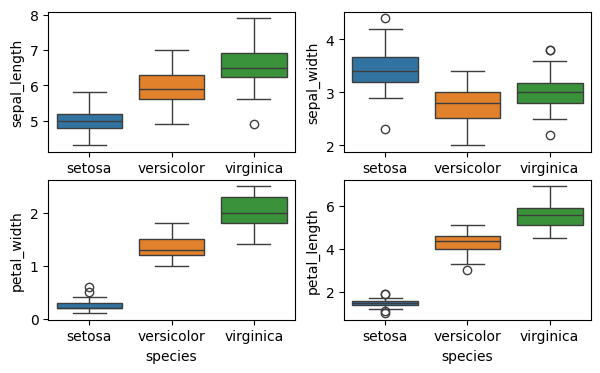

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 4))

for idx, feat in  enumerate(features):
    sns.boxplot(x='species', y = feat, data = iris, ax=axes[idx // 2, idx % 2],hue='species')
    axes[idx // 2, idx % 2].set_xlabel('species')
    axes[idx // 2, idx % 2].set_ylabel(feat);
plt.show();

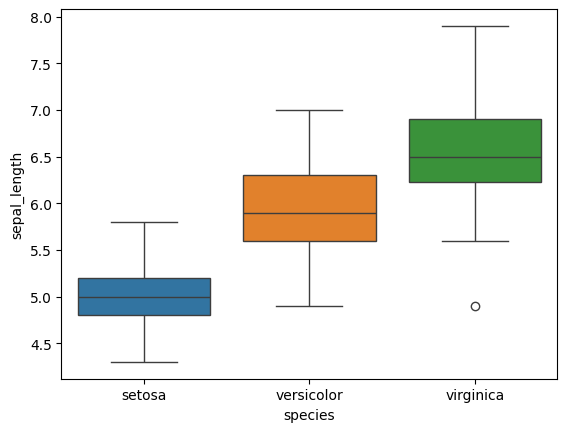

In [46]:
sns.boxplot(x='species', y = 'sepal_length', data = iris,hue='species');
plt.show();

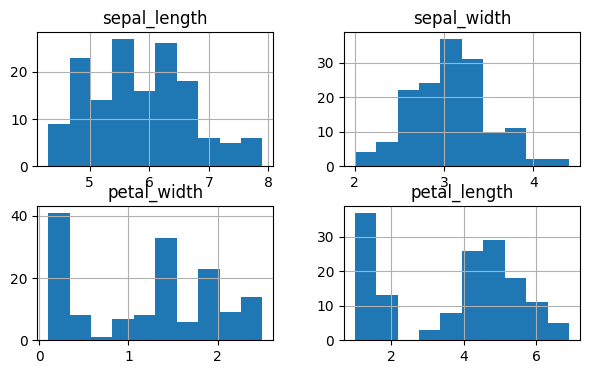

In [47]:
iris[features].hist(figsize=(7,4));
plt.show();

Кривые эндрюса. https://habr.com/ru/articles/248623/

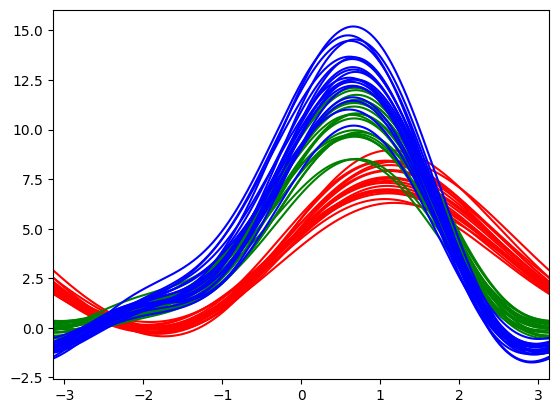

In [48]:
def andrews_curve(x,theta):
  curve = list()
  for th in theta:
    x1 = x[0] / np.sqrt(2)
    x2 = x[1] * np.sin(th)
    x3 = x[2] * np.cos(th)
    x4 = x[3] * np.sin(2.*th)
    curve.append(x1+x2+x3+x4)
  return curve

accuracy = 1000
samples = iris.drop(['species'],axis=1).values
theta = np.linspace(-np.pi, np.pi, accuracy)

for s in samples[:20]: # setosa
  plt.plot(theta, andrews_curve(s, theta), 'r')

for s in samples[50:70]: # versicolor
  plt.plot(theta, andrews_curve(s ,theta), 'g')

for s in samples[100:120]: # virginica
  plt.plot(theta, andrews_curve(s, theta), 'b')

plt.xlim(-np.pi,np.pi)
plt.show()


<font color = 'red' size = 5>Задание 1 </font>

1. Изучите примеры точечной работы с признаками в исходных данных. 
2. Поработав в документацией и примерами проведите отбор и подготовку признаков для знаменитого [titanik-датасета](https://www.kaggle.com/c/titanic/data) , а также для данных об  [операторах](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets)
    +  2.1 Визуализируйте признаки. Определите их типы.
    +  2.2 Удалите аномальные данные, где необходимо (простейшими методами z-score и IQR).
    +  2.3 Определите важные признаки с помощью описательной статитсики и корреляции.
    +  2.4 Заполните пропуски и поработайте с данными по своему усмотрению.
    +  2.5 Подготовленный датасет сохраните в новый csv файл.
   
        



[https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)


In [62]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train = pd.get_dummies(train,columns=["Sex","Embarked"],dtype='int')    #разбили на числовые признаки
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [65]:
train.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True)   # убрал ненужные признаки
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [66]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#избавляемся от пропусков
for col in train.select_dtypes(include=['object']).columns:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

In [2]:
def scale_data(data, column):
    scaler = StandardScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1)).flatten()
    return data

In [ ]:
# Применяем функцию к столбцам 'Age' и 'Fare'
train = scale_data(train, 'Age')
train = scale_data(train, 'Fare')
test = scale_data(test, 'Age')
test = scale_data(test, 'Fare')

In [70]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.530377,1,0,-0.502445,0,1,0,0,1
1,1,1,0.571831,1,0,0.786845,1,0,1,0,0
2,1,3,-0.254825,0,0,-0.488854,1,0,0,0,1
3,1,1,0.365167,1,0,0.420730,1,0,0,0,1
4,0,3,0.365167,0,0,-0.486337,0,1,0,0,1


Axes(0.125,0.11;0.62x0.77)


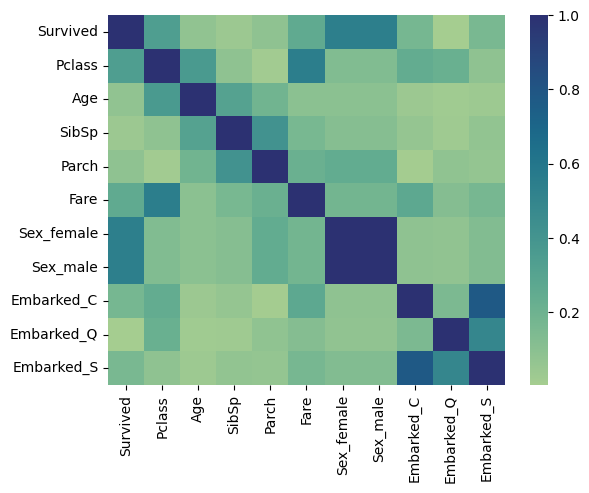

In [72]:
corr_matrix = train.corr().abs() 
print(sns.heatmap(corr_matrix,cmap="crest"))

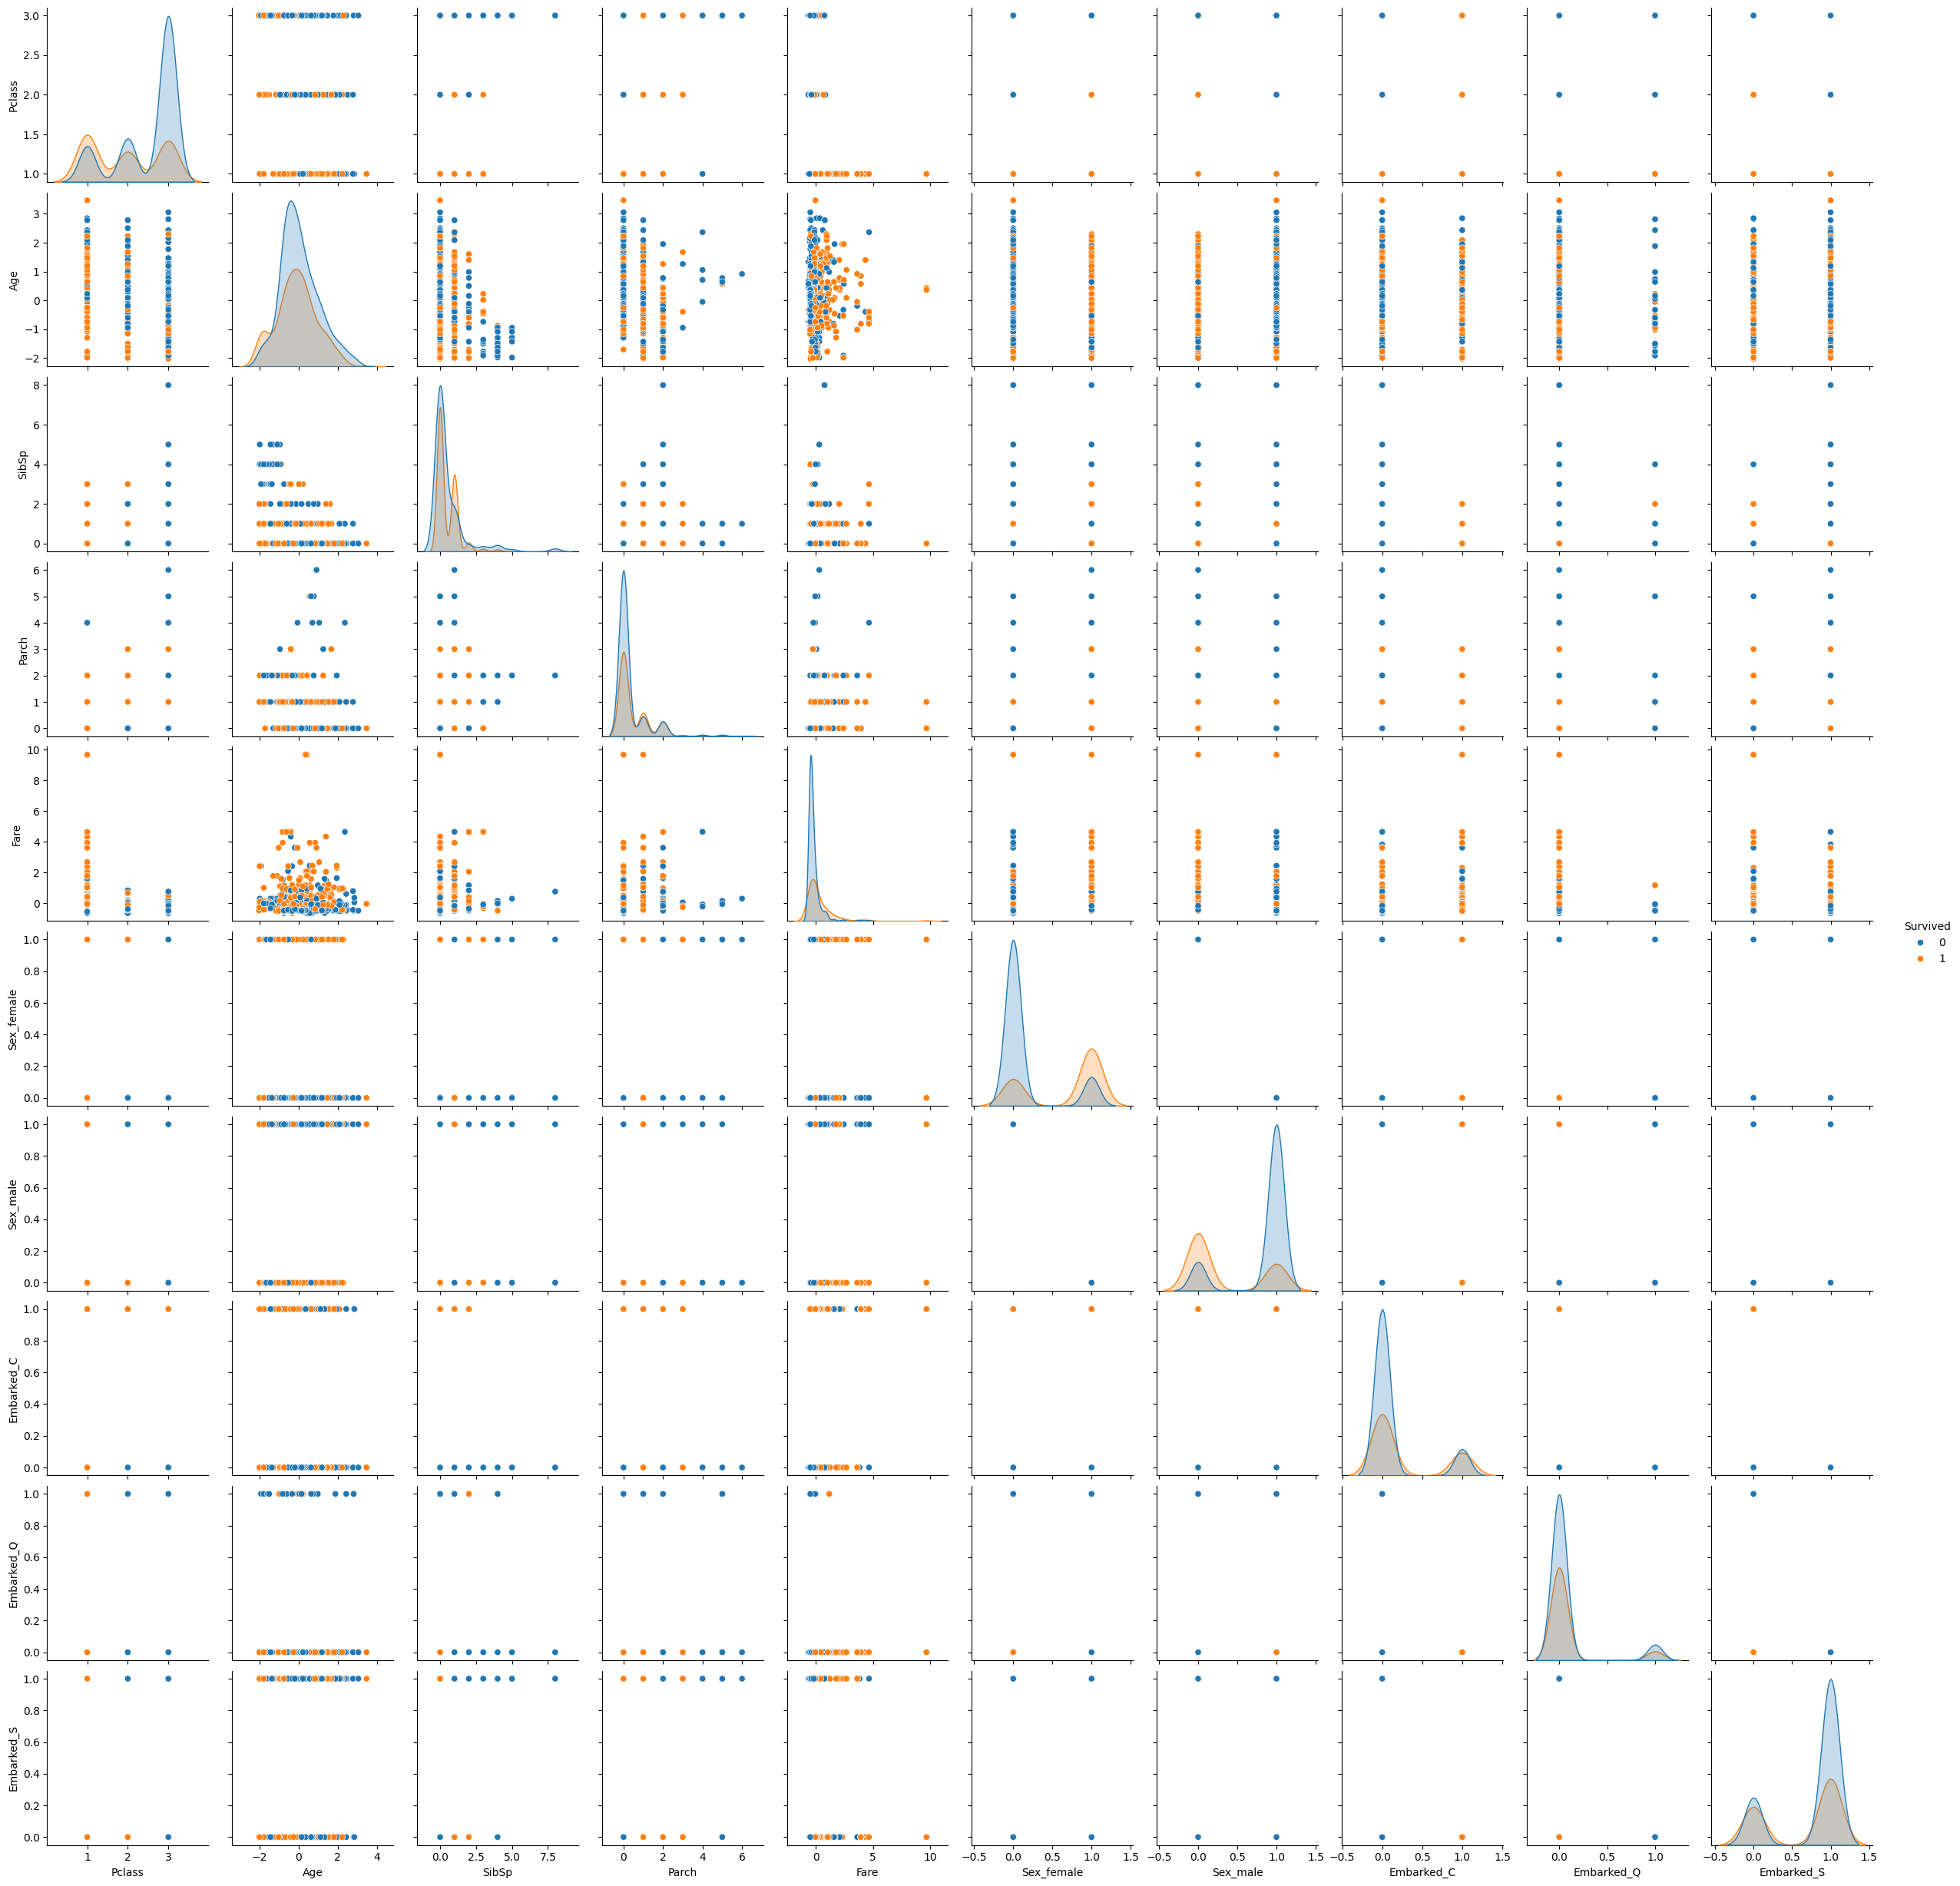

In [73]:
sns.pairplot(train, hue='Survived');

In [79]:
train.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,7.140000e+02,891.000000,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,2.388379e-16,0.523008,0.381594,3.987333e-18,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,1.000701e+00,1.102743,0.806057,1.000562e+00,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,-2.016979e+00,0.000000,0.000000,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,-6.595416e-01,0.000000,0.000000,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,-1.170488e-01,0.000000,0.000000,-3.573909e-01,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,5.718310e-01,1.000000,0.000000,-2.424635e-02,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,3.465126e+00,8.000000,6.000000,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
def remove_outliers_by_zscore(data, column):    
    cr_mean = np.nanmean(data[column].values)
    cr_std = np.nanstd(data[column].values)

    # Вычисляем Z-оценки
    data['Zscore_' + column] = (data[column] - cr_mean) / cr_std

    # Определяем порог Z-оценки
    z_3 = (3 * cr_std) + cr_mean
    z_minus3 = cr_mean - (3 * cr_std)

    # Заменяем выбросы на значения по порогу
    data.loc[data['Zscore_' + column] > 3, column] = z_3
    data.loc[data['Zscore_' + column] < -3, column] = z_minus3

    return data


In [81]:
train=remove_outliers_by_zscore(train, 'Age')
train=remove_outliers_by_zscore(train, 'Fare')
test=remove_outliers_by_zscore(test, 'Age')
test=remove_outliers_by_zscore(test, 'Fare')

In [85]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Zscore_Age,Zscore_Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,8.910000e+02
mean,0.383838,2.308642,-0.000724,0.523008,0.381594,-0.044340,0.352413,0.647587,0.188552,0.086420,0.722783,0.000000,3.987333e-18
std,0.486592,0.836071,0.998371,1.102743,0.806057,0.744619,0.477990,0.477990,0.391372,0.281141,0.447876,1.000701,1.000562e+00
min,0.000000,1.000000,-2.016979,0.000000,0.000000,-0.648422,0.000000,0.000000,0.000000,0.000000,0.000000,-2.016979,-6.484217e-01
25%,0.000000,2.000000,-0.659542,0.000000,0.000000,-0.489148,0.000000,0.000000,0.000000,0.000000,0.000000,-0.659542,-4.891482e-01
50%,0.000000,3.000000,-0.117049,0.000000,0.000000,-0.357391,0.000000,1.000000,0.000000,0.000000,1.000000,-0.117049,-3.573909e-01
75%,1.000000,3.000000,0.571831,1.000000,0.000000,-0.024246,1.000000,1.000000,0.000000,0.000000,1.000000,0.571831,-2.424635e-02
max,1.000000,3.000000,3.000000,8.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.465126,9.667167e+00


In [87]:
train.drop(['Zscore_Age','Zscore_Fare'],axis=True,inplace=True)
test.drop(['Zscore_Age','Zscore_Fare'],axis=True,inplace=True)

In [89]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.530377,1,0,-0.502445,0,1,0,0,1
1,1,1,0.571831,1,0,0.786845,1,0,1,0,0
2,1,3,-0.254825,0,0,-0.488854,1,0,0,0,1
3,1,1,0.365167,1,0,0.420730,1,0,0,0,1
4,0,3,0.365167,0,0,-0.486337,0,1,0,0,1


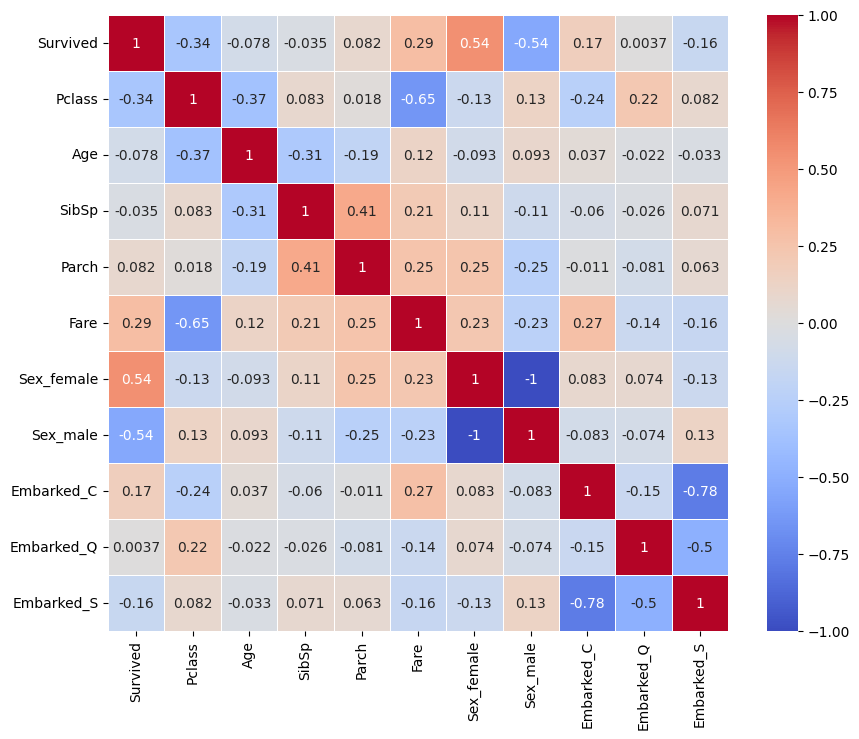

In [98]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [99]:
train.to_csv('newTrain.csv', index=False)
test.to_csv('newTest.csv', index=False)

In [143]:
titanic=pd.read_csv('newTrain.csv').dropna()
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.530377,1,0,-0.502445,0,1,0,0,1
1,1,1,0.571831,1,0,0.786845,1,0,1,0,0
2,1,3,-0.254825,0,0,-0.488854,1,0,0,0,1
3,1,1,0.365167,1,0,0.420730,1,0,0,0,1
4,0,3,0.365167,0,0,-0.486337,0,1,0,0,1


In [144]:
X= titanic.drop(['Survived'],axis=True).values
Y=titanic['Survived']

In [145]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=11)

In [146]:
lr= LogisticRegression()
lr.fit(Xtrain,ytrain)

LogisticRegression()

In [147]:
model = lr.predict(Xtest)
print(accuracy_score(ytest, model))
print(classification_report(ytest,model,target_names=['Positive','Negative']))

0.7534883720930232
              precision    recall  f1-score   support

    Positive       0.79      0.81      0.80       130
    Negative       0.70      0.67      0.68        85

    accuracy                           0.75       215
   macro avg       0.74      0.74      0.74       215
weighted avg       0.75      0.75      0.75       215



<Axes: >

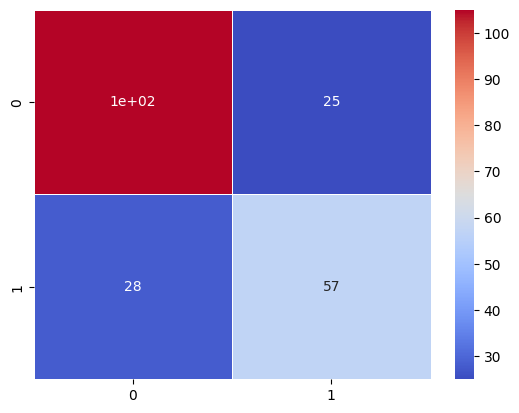

In [148]:
confusion = confusion_matrix(ytest, model)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

In [149]:
kfold = KFold(n_splits=10, shuffle=True, random_state = RANDOM_STATE)
result_lr=cross_val_score(lr,X, Y,cv=10,scoring='accuracy')
print(result_lr.mean())

0.7954812206572769


<Axes: >

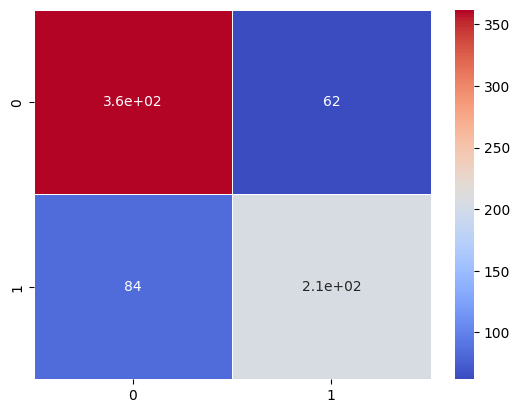

In [150]:
model = cross_val_predict(lr,X,Y,cv=10)
matr = confusion_matrix(Y, model)
sns.heatmap(matr, annot=True, cmap='coolwarm', linewidths=0.5)

In [4]:
telep = pd.read_csv('telecom.csv')
telep.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
telep=pd.get_dummies(telep,columns=["International plan","Voice mail plan"])
telep.drop(['Area code', 'State'], axis=1, inplace=True)
telep.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,True,False,False,True
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,True,False,False,True
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,True,False,True,False
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,False,True,True,False
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,False,True,True,False


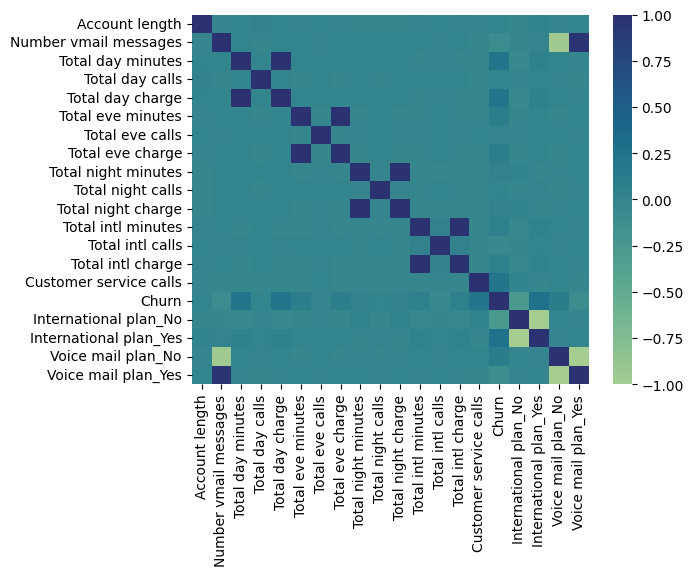

In [6]:
corr_matrix = telep.corr()
sns.heatmap(corr_matrix,cmap="crest");

In [7]:
telep = scale_data(telep, 'Total day minutes')
telep = scale_data(telep, 'Total eve minutes')
telep = scale_data(telep, 'Total intl minutes')
telep = scale_data(telep, 'Total night minutes')
telep = scale_data(telep, 'Customer service calls')

In [8]:
telep = remove_outliers_by_zscore(telep, 'Total day minutes')
telep = remove_outliers_by_zscore(telep, 'Total eve minutes')
telep = remove_outliers_by_zscore(telep, 'Total intl minutes')
telep = remove_outliers_by_zscore(telep, 'Total night minutes')
telep = remove_outliers_by_zscore(telep, 'Customer service calls')

In [9]:
telep.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes,Zscore_Total day minutes,Zscore_Total eve minutes,Zscore_Total intl minutes,Zscore_Total night minutes,Zscore_Customer service calls
0,128,25,1.566767,110,45.07,-0.070610,99,16.78,0.866743,91,...,False,True,False,False,True,1.566767,-0.070610,-0.085008,0.866743,-0.427932
1,107,26,-0.333738,123,27.47,-0.108080,103,16.62,1.058571,103,...,False,True,False,False,True,-0.333738,-0.108080,1.240482,1.058571,-0.427932
2,137,0,1.168304,114,41.38,-1.573383,110,10.30,-0.756869,104,...,False,True,False,True,False,1.168304,-1.573383,0.703121,-0.756869,-1.188218
3,84,0,2.196596,71,50.90,-2.742865,88,5.26,-0.078551,89,...,False,False,True,True,False,2.196596,-2.742865,-1.303026,-0.078551,0.332354
4,75,0,-0.240090,113,28.34,-1.038932,122,12.61,-0.276311,121,...,False,False,True,True,False,-0.240090,-1.038932,-0.049184,-0.276311,1.092641


In [10]:
telep = telep.drop(set(telep.columns) - set(['Churn', 'International plan_No', 
                                 'International plan_Yes', 'Voice mail plan_No',
                                 'Voice mail plan_Yes','Total day minutes', 
                                 'Total eve minutes','Total night minutes', 
                                 'Total intl minutes','Customer service calls']), axis=1)

In [11]:
telep.head()

,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,1.566767,-0.070610,0.866743,-0.085008,-0.427932,False,True,False,False,True
1,-0.333738,-0.108080,1.058571,1.240482,-0.427932,False,True,False,False,True
2,1.168304,-1.573383,-0.756869,0.703121,-1.188218,False,True,False,True,False
3,2.196596,-2.742865,-0.078551,-1.303026,0.332354,False,False,True,True,False
4,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,False,False,True,True,False


In [13]:
tel = pd.read_csv('newTelecom.csv').dropna()
tel.head()

,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,1.566767,-0.070610,0.866743,-0.085008,-0.427932,False,True,False,False,True
1,-0.333738,-0.108080,1.058571,1.240482,-0.427932,False,True,False,False,True
2,1.168304,-1.573383,-0.756869,0.703121,-1.188218,False,True,False,True,False
3,2.196596,-2.742865,-0.078551,-1.303026,0.332354,False,False,True,True,False
4,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,False,False,True,True,False


In [14]:
X = tel.drop(['Churn'],axis=True).values
Y = tel['Churn']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.4,random_state=11)

In [15]:
lr= LogisticRegression()
lr.fit(Xtrain,ytrain)

model = lr.predict(Xtest)
print(accuracy_score(ytest, model))
print(classification_report(ytest, model,target_names=['Positive','Negative']))

0.8575712143928036
              precision    recall  f1-score   support

    Positive       0.88      0.97      0.92      1139
    Negative       0.54      0.19      0.28       195

    accuracy                           0.86      1334
   macro avg       0.71      0.58      0.60      1334
weighted avg       0.83      0.86      0.83      1334



<Axes: >

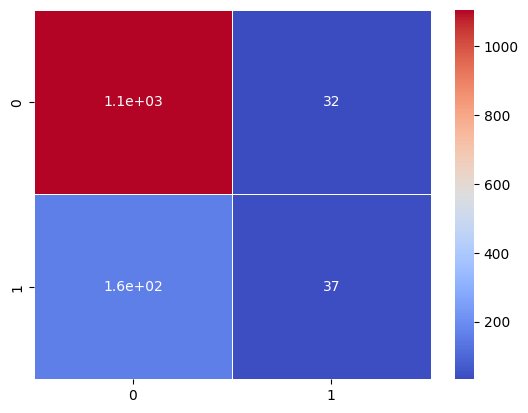

In [16]:
confusion = confusion_matrix(ytest, model)
sns.heatmap(confusion, annot=True, cmap='coolwarm', linewidths=0.5)

In [17]:
kfold = KFold(n_splits=10, shuffle=True, random_state = RANDOM_STATE)
result_lr=cross_val_score(lr,X, Y,cv=10,scoring='accuracy')
print(result_lr.mean())

0.8607820395245545


<Axes: >

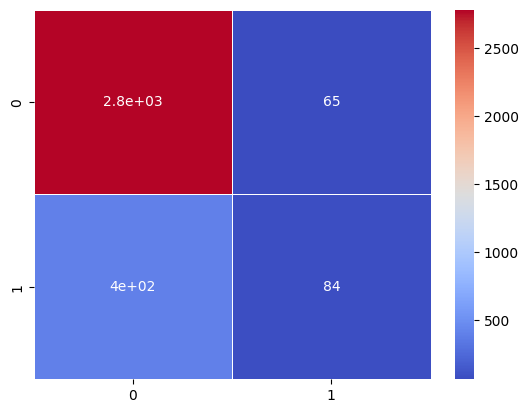

In [18]:
model = cross_val_predict(lr,X,Y,cv=10)
matr = confusion_matrix(Y, model)
sns.heatmap(matr, annot=True, cmap='coolwarm', linewidths=0.5)

### <font color = 'green'> Пример 5. Работа с текстом </font>

#### Очень простой bag of words

In [1]:
from functools import reduce
import numpy as np

texts = [['i', 'love', 'my', 'mmf'],
         ['he', 'hate', 'my', 'mmf'],
         ['he', 'and', 'i', 'hate', 'and', 'love', 'my','mmf']]

dictionary = list(enumerate(set(list(reduce(lambda x, y: x + y, texts)))))

def vectorize(text):
    vector = np.zeros(len(dictionary))
    for i, word in dictionary:
        num = 0
        for w in text:
            if w == word:
                num += 1
        if num:
            vector[i] = num
    return vector

for t in texts:
    print(vectorize(t))

[1. 1. 0. 0. 0. 1. 1.]
[0. 1. 0. 1. 1. 1. 0.]
[1. 1. 2. 1. 1. 1. 1.]


In [3]:
dictionary

[(0, 'love'),
 (1, 'mmf'),
 (2, 'and'),
 (3, 'hate'),
 (4, 'he'),
 (5, 'my'),
 (6, 'i')]

#### Bag of words с N-grams

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 1))
vect.fit_transform(["no i have questions", "i have no questions"]).toarray()

array([[1, 1, 1],
       [1, 1, 1]])

In [5]:
vect.vocabulary_

{'no': 1, 'have': 0, 'questions': 2}

In [11]:
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit_transform(["no i have questions", "i have no questions"]).toarray()

array([[1, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1]])

In [13]:
vect.get_feature_names_out()

array(['have', 'have no', 'have questions', 'no', 'no have',
       'no questions', 'questions'], dtype=object)

In [9]:
vect.vocabulary_

{'no': 3,
 'have': 0,
 'questions': 6,
 'no have': 4,
 'have questions': 2,
 'have no': 1,
 'no questions': 5}

#### TF- IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
Document1= "It is going to rain today."
Document2= "Today I am not going outside."
Document3= "I am going to watch the season premiere."
Doc = [Document1 ,
       Document2 , 
       Document3]
print(Doc)

['It is going to rain today.', 'Today I am not going outside.', 'I am going to watch the season premiere.']


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(Doc)

In [39]:
print('Document transform\n',X.toarray())

Document transform
 [[0.42544054 0.         0.         0.72033345 0.         0.54783215
  0.        ]
 [0.42544054 0.72033345 0.         0.         0.         0.54783215
  0.        ]
 [0.32274454 0.         0.54645401 0.         0.54645401 0.
  0.54645401]]


In [40]:
X.toarray()[0]

array([0.42544054, 0.        , 0.        , 0.72033345, 0.        ,
       0.54783215, 0.        ])

In [41]:
print(vectorizer.vocabulary_)

{'going': np.int64(0), 'rain': np.int64(3), 'today': np.int64(5), 'outside': np.int64(1), 'watch': np.int64(6), 'season': np.int64(4), 'premiere': np.int64(2)}


<font color = 'red' size = 5>Задание 2 </font>

1. Изучите изложенный выше пример работы с текстовым датасетом. 
2. Подготовьте к дальнейшей работе текстовый датасет отзывов к фильмам. [Imdb - rews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) .
    +  2.1 Используя встроенные возможности *TfidfVectorizer*.
    +  2.2 Реализовав аналог самостоятельно.
    +  2.3 Подготовленный датасет сохраните в новый csv файл.
   
        



[https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/)

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [5]:
def preprocess_text(text):
    text = text.lower()  # Приведение к нижнему регистру
    text = re.sub(r'<[^>]+>', '', text)  # Удаление HTML-тегов
    text = re.sub(r'\W', ' ', text)  # Удаление символов
    text = re.sub(r'\s+', ' ', text)  # Удаление лишних пробелов
    return text.strip()

data['prep_review'] = data['review'].apply(preprocess_text)

data.head()

,review,sentiment,prep_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...


In [ ]:
X_text = data['prep_review'] 
Y = data['sentiment'].map({'positive': 1, 'negative': 0})  

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(X_text)

In [10]:
vectorizer.vocabulary_

{'mentioned': np.int64(556),
 'watching': np.int64(953),
 'just': np.int64(461),
 'episode': np.int64(269),
 'll': np.int64(513),
 'right': np.int64(719),
 'exactly': np.int64(278),
 'happened': np.int64(390),
 'thing': np.int64(874),
 'scenes': np.int64(742),
 'violence': np.int64(937),
 'set': np.int64(764),
 'word': np.int64(974),
 'sex': np.int64(767),
 'classic': np.int64(145),
 'use': np.int64(918),
 'called': np.int64(109),
 'given': np.int64(366),
 'state': np.int64(826),
 'city': np.int64(143),
 'prison': np.int64(671),
 'face': np.int64(289),
 'high': np.int64(405),
 'home': np.int64(412),
 'death': np.int64(202),
 'far': np.int64(305),
 'away': np.int64(57),
 'say': np.int64(737),
 'main': np.int64(528),
 'fact': np.int64(290),
 'goes': np.int64(371),
 'shows': np.int64(779),
 'wouldn': np.int64(984),
 'forget': np.int64(341),
 'pretty': np.int64(669),
 'audiences': np.int64(54),
 'romance': np.int64(725),
 'doesn': np.int64(232),
 'mess': np.int64(557),
 'saw': np.int64(736

In [ ]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13387751, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
res = pd.DataFrame(data['review'])
res['sentiment'] = Y.values
res['tfidf_features'] = [X.getrow(i) for i in range(X.shape[0])]    # как разряженную матрицу

In [28]:
res.head()

,review,sentiment,tfidf_features
0,One of the other reviewers has mentioned that ...,1,<Compressed Sparse Row sparse matrix of dtype ...
1,A wonderful little production. <br /><br />The...,1,<Compressed Sparse Row sparse matrix of dtype ...
2,I thought this was a wonderful way to spend ti...,1,<Compressed Sparse Row sparse matrix of dtype ...
3,Basically there's a family where a little boy ...,0,<Compressed Sparse Row sparse matrix of dtype ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,<Compressed Sparse Row sparse matrix of dtype ...


In [29]:
res.to_csv('newIMDB.csv', index=False)

## <font color = 'green'> 2. Введение в классификацию.  </font>

[[ 7.96866351 -7.9635571 ]]


array([-0.76660652])

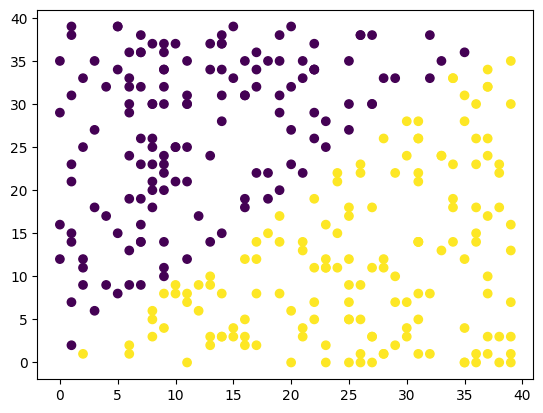

In [30]:
X_data = np.random.randint(0,40,(300,2))
rows = np.where(X_data[:,0]!=X_data[:,1])
X_data = X_data[rows]
y_data = np.array([int(np.sign(elem[0]-elem[1])==1) for elem in X_data])

plt.scatter(X_data[:,0],X_data[:,1],c = y_data);

inner_model = LogisticRegression(penalty=None)
inner_model.fit(X_data, y_data)

inner_preds = inner_model.predict(X_data)
inner_preds_pr = inner_model.predict_proba(X_data)
 # accuracy
(inner_preds == y_data).mean()

inner_preds_pr

print(inner_model.coef_)

inner_model.intercept_

<font color = 'red' size = 5>Задание 3 </font>

Используя встроенные возможности *python* реализуйте простую модель классифиакатора для данных из з. 1. Сделайте выводы о точности, используя метрику *accurancy_score*.
